# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combined_df['Mouse ID'].nunique()
mouse_count

249

In [3]:
duplicate_filter=combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse = combined_df[duplicate_filter]
duplicate_id =duplicate_mouse["Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
filter= combined_df["Mouse ID"].isin(duplicate_id)
combined_df[filter].head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~(filter)]
clean_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    SEM=lambda x: x.std() / (len(x) ** 0.5)  # Standard Error of the Mean
).reset_index()

# Set the treatment regimen as the index
summary_statistics.set_index('Drug Regimen', inplace=True)
summary_statistics

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

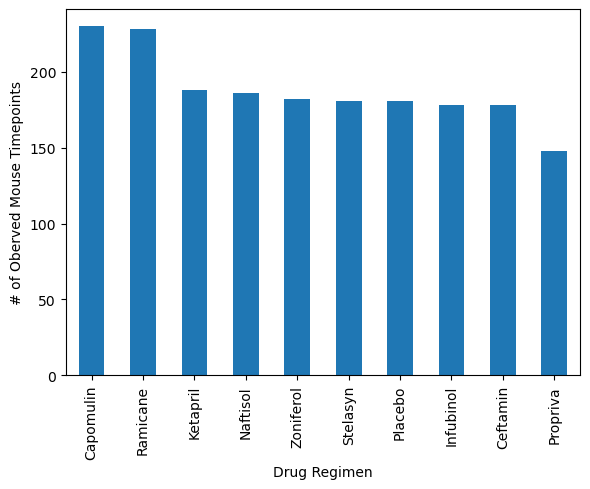

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_chart = (clean_df['Drug Regimen']).value_counts().plot(kind='bar', figsize=(6,5))

xticklabels = (clean_df['Drug Regimen'])
count_chart.set_xlabel('Drug Regimen')
count_chart.set_ylabel('# of Oberved Mouse Timepoints')
plt.tight_layout()
plt.show()

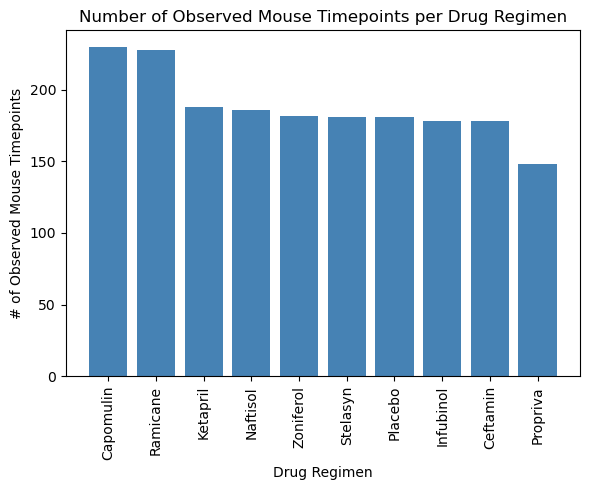

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_chart = (clean_df['Drug Regimen']).value_counts()
plt.figure(figsize=(6, 5))
plt.bar(count_chart.index, count_chart.values, color='steelblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90) 
plt.title('Number of Observed Mouse Timepoints per Drug Regimen')
plt.tight_layout()

# Show the plot
plt.show()

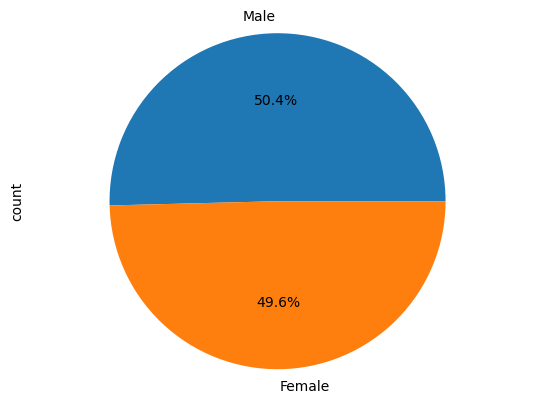

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male_female = clean_df.groupby('Mouse ID')['Sex'].first()
mf = male_female.value_counts()

# Make the pie chart
pie = mf.plot(kind='pie',autopct='%1.1f%%',y='Sex')

plt.ylabel('count')
plt.axis('equal')
plt.show()

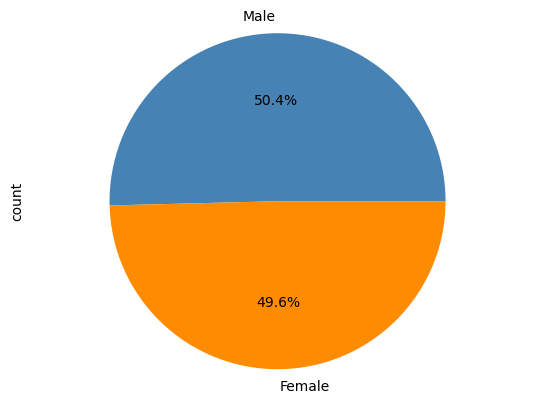

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male_female = clean_df.groupby('Mouse ID')['Sex'].unique()

# Make the pie chart
sex = ['Male','Female']
count = male_female.value_counts()
colors = ['steelblue','darkorange']
plt.pie(count, labels=sex, colors=colors,autopct="%1.1f%%")
plt.ylabel('count')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])

In [15]:
# List all the treatments to create the list in the next step (dataframe merged on the step above)
merged_data["Drug Regimen"].unique()
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
new_list = []
for treatment in treatments:
# Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
 # append is adding a subset
    new_list.append(tumor_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment} outliers are equal to {outliers}")

Capomulin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are equal to 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers are equal to Series([], Name: Tumor Volume (mm3), dtype: float64)


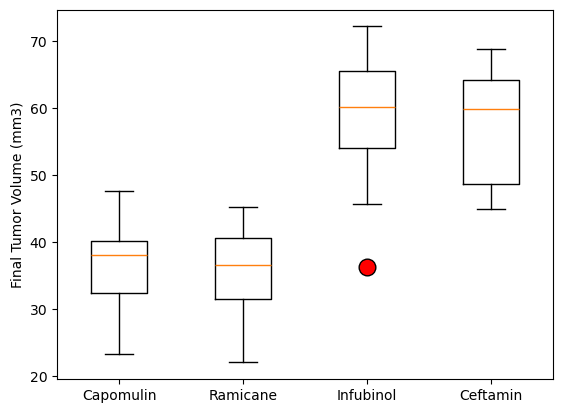

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
plt.boxplot(new_list, flierprops=flierprops,labels = treatments)
plt.xticks(rotation=360)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show() 

## Line and Scatter Plots

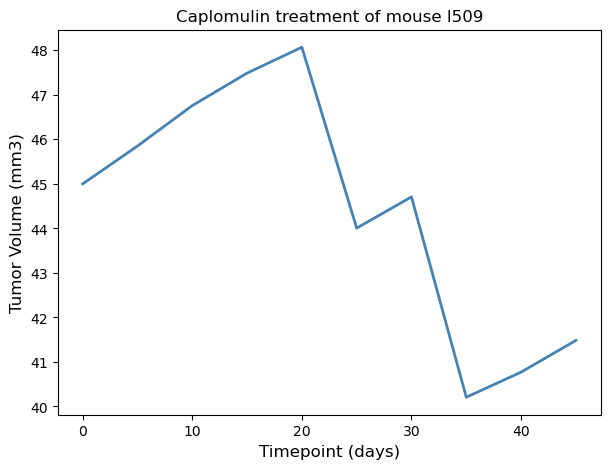

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509' 
mouse_data = clean_df[clean_df['Mouse ID'] == mouse_id]

plt.figure(figsize=(7,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='steelblue', linewidth=2)
plt.title(f'Caplomulin treatment of mouse {mouse_id}',fontsize=12)
plt.xlabel('Timepoint (days)',fontsize=12)
plt.ylabel('Tumor Volume (mm3)',fontsize=12)
plt.show()

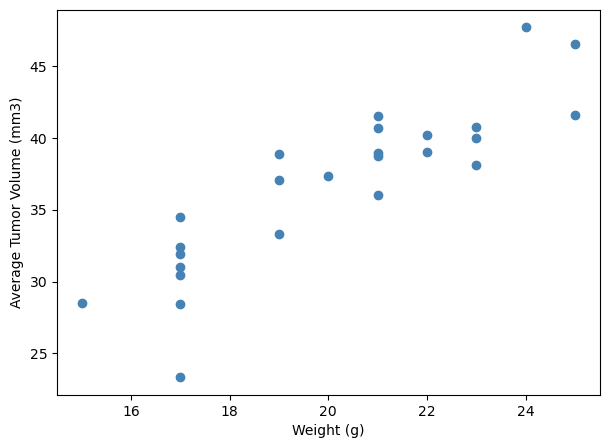

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin",:]
mouse_weights = capomulin_data['Weight (g)']
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

plt.figure(figsize=(7, 5))
plt.scatter(mouse_weights, tumor_volumes, color='steelblue', alpha=1.0)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


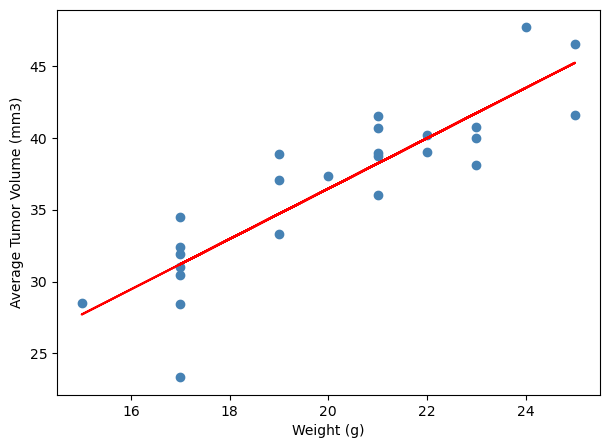

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_mean = np.mean(mouse_weights)
y_mean = np.mean(tumor_volumes)
numerator = np.sum((mouse_weights - x_mean) * (tumor_volumes - y_mean))
denominator = np.sum((mouse_weights - x_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - (slope * x_mean)
regress_values = slope * mouse_weights + intercept
correlation = np.corrcoef(mouse_weights, tumor_volumes)[0, 1]

print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

plt.figure(figsize=(7, 5))
plt.scatter(mouse_weights, tumor_volumes, color='steelblue', alpha=1.0, label='Data points')
plt.plot(mouse_weights, regress_values, color='red', label='Regression line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()